# Reducción de Dimensionalidad con PCA para Análisis de Vehículos

Este proyecto aplica la técnica de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un dataset con características de distintos modelos de vehículos, permitiendo visualizar y analizar las diferencias entre todoterrenos y turismos en un espacio de dimensiones reducidas.

![Texto alternativo](coches.jpeg)

## Objetivos

El objetivo de este análisis es reducir la dimensionalidad de un dataset que contiene características de distintos modelos de vehículos, en especial todoterrenos y turismos.

Utilizando la técnica de PCA realizaremos una reducción de dimensionalidad de las variables que indican las características (tamaño del motor, distancia entre ejes, longitud, anchura, etc.) y posteriormente evaluaremos si los todoterrenos y turismos quedan identificados en el espacio reducido.

## Configuración del Entorno y Carga de Datos

### Importación de Librerías

In [13]:
# 1. Importando librerias
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


### Carga del Dataset

In [14]:
coche=pd.read_csv('Car_sales.csv')
coche.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


### Preprocesamiento Inicial

Observamos que en este dataset los nombres de las variables contienen espacios, y algunos datos aparecen como '.' (valores faltantes). Procedemos a limpiar y preparar los datos. 

In [15]:
coche = coche.rename(columns={'Sales in thousands':'Sales_in_thousands','4-year resale value':'4_year_resale_value','Vehicle type':'Vehicle_type','Price in thousands':'Price_in_thousands','Engine size':'Engine_size','Curb weight':'Curb_weight','Fuel capacity':'Fuel_capacity','Fuel efficiency':'Fuel_efficiency','Latest Launch':'Latest_Launch'})
coche=coche.replace('.','NaN')

### Exploración de la Estructura del Dataset

In [16]:
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   4_year_resale_value  157 non-null    object 
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   157 non-null    object 
 6   Engine_size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb_weight          157 non-null    object 
 12  Fuel_capacity        157 non-null    object 
 13  Fuel_efficiency      157 non-null    object 
 14  Latest_Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

### Conversión de Tipos de Datos

Observamos que varias columnas que deberían ser numéricas (float) están almacenadas como objetos (object). Convertimos estas columnas al tipo numérico apropiado.

In [17]:
coche[['4_year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']]=coche[['4_year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']].astype(float)

### Eliminación de Duplicados

In [18]:
coche = coche.drop_duplicates()
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   4_year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

### Análisis y Tratamiento de Valores Faltantes

Continuamos con el análisis y tratamiento de valores faltantes (missing data) en el dataset.

In [19]:
coche.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
4_year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
dtype: int64

In [20]:
coche.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '4_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch'],
      dtype='object')

### Estrategia de Imputación

Observamos valores faltantes en varias columnas. Analizamos las distribuciones de las variables numéricas para determinar la estrategia de imputación más adecuada (mediana para variables sesgadas, media para variables más normales).

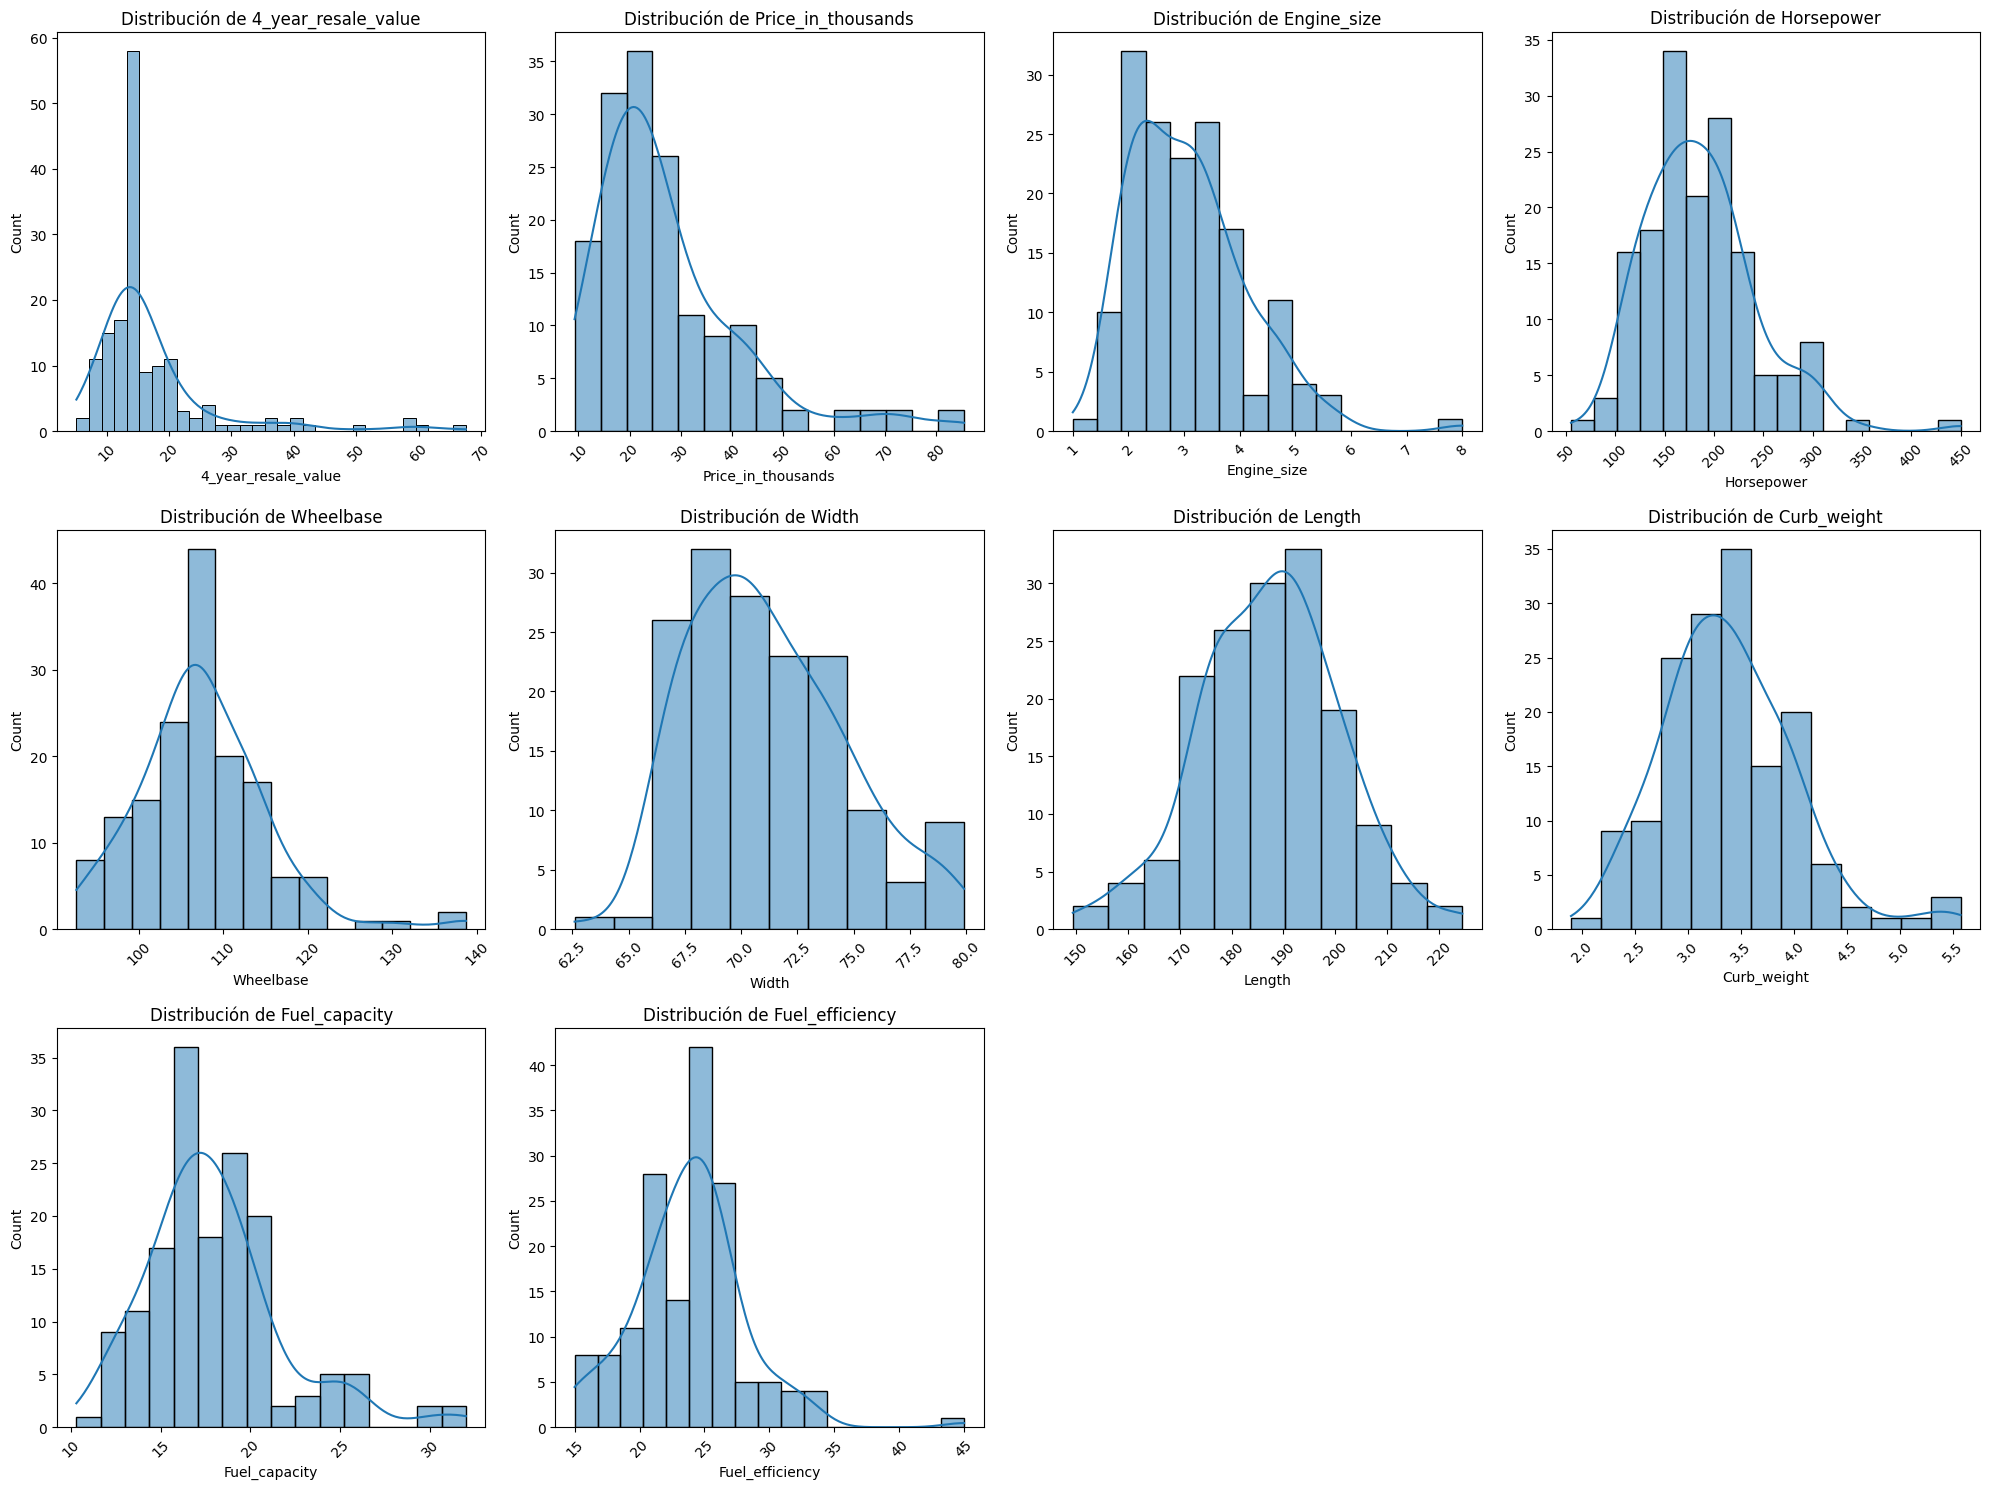

In [25]:
# distribuciones de las variables numéricas
numeric_cols = ['4_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower',
                'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency']

# Crear una figura con subplots en una matriz 3x4
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(coche[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
**Análisis de distribuciones:**

- **4_year_resale_value**: Fuertemente sesgada a la derecha con valores atípicos
- **Price_in_thousands**: Distribución asimétrica positiva
- **Engine_size**: Multimodal
- **Horsepower**: Aproximadamente normal pero con cola derecha
- **Wheelbase**: Distribución bimodal
- **Width**: Aproximadamente normal
- **Length**: Aproximadamente normal
- **Curb_weight**: Ligeramente sesgada a la derecha
- **Fuel_capacity**: Asimétrica positiva
- **Fuel_efficiency**: Aproximadamente normal

Basándonos en estas distribuciones, utilizamos mediana para variables sesgadas y media para variables más normales.

In [26]:
# Imputacion 
numeric_cols = ['4_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower',
                'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency']

# Convertir a numérico
for col in numeric_cols:
    coche[col] = pd.to_numeric(coche[col], errors='coerce')

# Imputación más robusta usando la mediana para variables sesgadas
skewed_vars = ['4_year_resale_value', 'Price_in_thousands', 'Engine_size', 
               'Fuel_capacity', 'Curb_weight']
normal_vars = [col for col in numeric_cols if col not in skewed_vars]

# Imputar usando mediana para variables sesgadas y media para las más normales
for col in skewed_vars:
    coche[col] = coche[col].fillna(coche[col].median())
    
for col in normal_vars:
    coche[col] = coche[col].fillna(coche[col].mean())

# Verificar imputación
print("Valores faltantes después de imputación:")
print(coche[numeric_cols].isnull().sum())

Valores faltantes después de imputación:
4_year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
dtype: int64


## Preparación para PCA

Antes de aplicar PCA, realizamos dos revisiones importantes:

1. **Estandarización de variables**: Verificamos que la escala de medida de las variables sea similar. Si no es así, aplicamos estandarización.

2. **Análisis de correlaciones**: Revisamos la correlación entre las variables, ya que las variables correlacionadas son las que aportarán una mayor reducción de la dimensionalidad.

In [27]:
# 9.1 Verificar escala y estandarizar
print("Estadísticas descriptivas de las variables:")
print(coche[numeric_cols].describe())

# Estandarizamos las variables
scaler = StandardScaler()
coche_scaled = pd.DataFrame(
    scaler.fit_transform(coche[numeric_cols]),
    columns=numeric_cols
)

print("\nEstadísticas después de estandarización:")
print(coche_scaled.describe())



Estadísticas descriptivas de las variables:
       4_year_resale_value  Price_in_thousands  Engine_size  Horsepower  \
count           157.000000          157.000000   157.000000  157.000000   
mean             17.180318           27.332261     3.060510  185.894904   
std              10.178562           14.268713     1.041311   56.522319   
min               5.160000            9.235000     1.000000   55.000000   
25%              12.545000           18.145000     2.300000  150.000000   
50%              14.180000           22.799000     3.000000  177.500000   
75%              18.140000           31.930000     3.500000  215.000000   
max              67.550000           85.500000     8.000000  450.000000   

        Wheelbase       Width      Length  Curb_weight  Fuel_capacity  \
count  157.000000  157.000000  157.000000   157.000000     157.000000   
mean   107.484076   71.146178  187.347134     3.377567      17.947134   
std      7.616872    3.441124   13.388708     0.626460       

In [ ]:

**Resultados de la estandarización:**

Se observan grandes diferencias en las escalas originales:
- **Price_in_thousands**: rango de 9.2 a 85.5
- **Engine_size**: rango de 1.0 a 8.0
- **Horsepower**: rango de 55 a 450
- **Dimensiones** (Length, Width, etc): rangos en centenas

La estandarización era necesaria y se realizó correctamente:
- Todas las variables ahora tienen media ≈ 0
- Desviación estándar ≈ 1
- Rangos comparables entre -3 y +5 desviaciones estándar

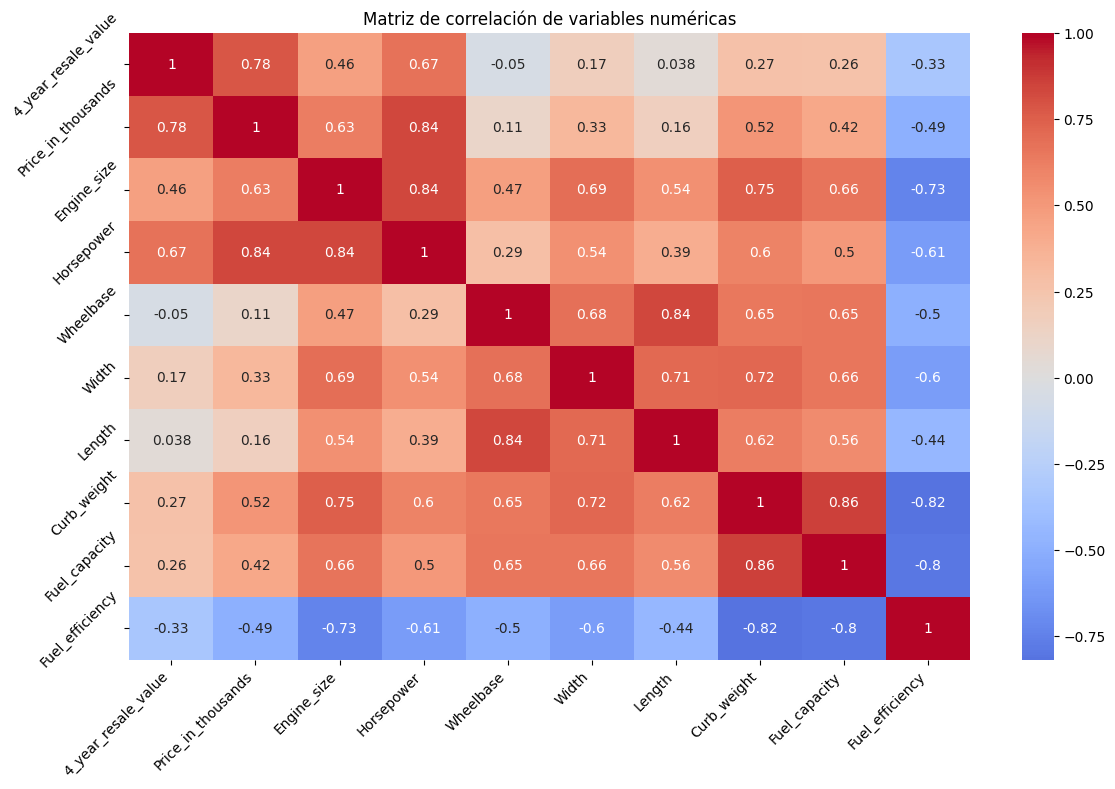


Pares de variables con alta correlación (>0.7):
4_year_resale_value - Price_in_thousands: 0.784
Price_in_thousands - Horsepower: 0.837
Engine_size - Horsepower: 0.837
Engine_size - Curb_weight: 0.754
Engine_size - Fuel_efficiency: -0.734
Wheelbase - Length: 0.840
Width - Length: 0.710
Width - Curb_weight: 0.718
Curb_weight - Fuel_capacity: 0.864
Curb_weight - Fuel_efficiency: -0.818
Fuel_capacity - Fuel_efficiency: -0.801


In [28]:
# 9.2 Matriz de correlaciones
plt.figure(figsize=(12,8))
correlation_matrix = coche[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de variables numéricas')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de correlaciones
print("\nPares de variables con alta correlación (>0.7):")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.7:
            print(f"{numeric_cols[i]} - {numeric_cols[j]}: {corr:.3f}")

In [ ]:
**Análisis de correlaciones:**

Los resultados sugieren:
- **Redundancia en medidas de tamaño**: Length y Wheelbase están altamente correlacionadas (0.84)
- **Variables de potencia relacionadas**: Engine_size y Horsepower muestran alta correlación (0.837)
- **Consumo de combustible**: Está inversamente relacionado con tamaño/potencia (correlaciones negativas con Fuel_efficiency)
- **Precio y potencia**: Price_in_thousands está relacionado con Horsepower (0.837)

Estas correlaciones indican que PCA será efectivo para reducir la dimensionalidad, ya que existe redundancia en la información.

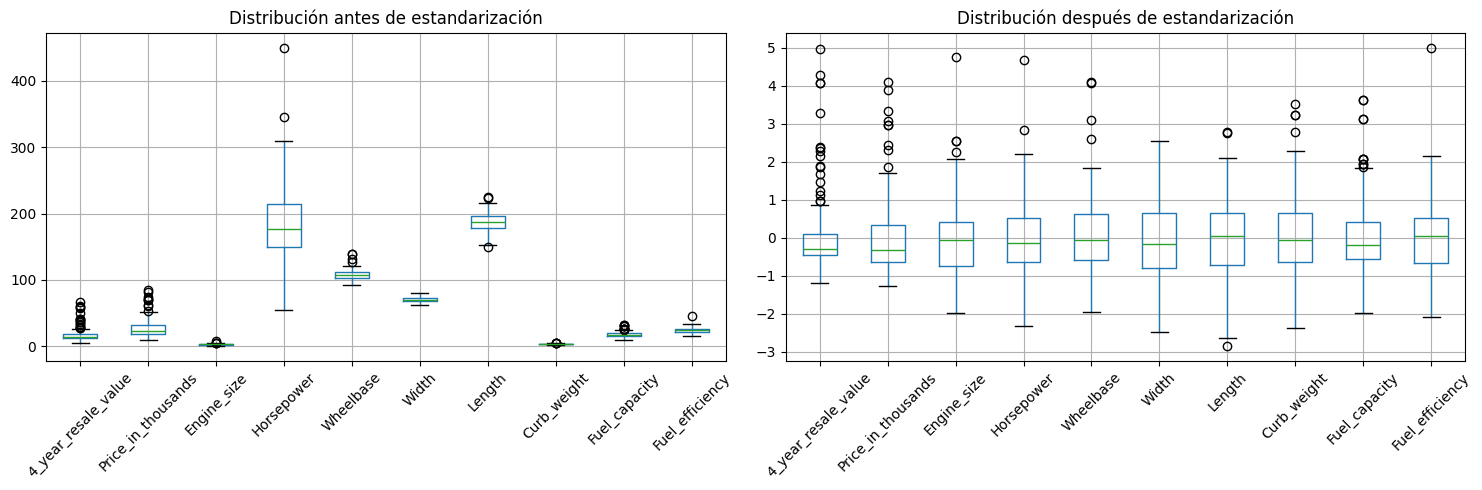

In [29]:
# Visualización de las escalas antes y después de la estandarización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Boxplots antes de estandarización
coche[numeric_cols].boxplot(ax=ax1)
ax1.set_title('Distribución antes de estandarización')
ax1.tick_params(axis='x', rotation=45)

# Boxplots después de estandarización
coche_scaled.boxplot(ax=ax2)
ax2.set_title('Distribución después de estandarización')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Selección de Casos de Prueba

Seleccionamos 2 observaciones, una de cada tipo de vehículo (Passenger y Car), para posteriormente comprobar en qué grupo quedarían localizadas después de aplicar PCA. Esto nos permitirá validar la capacidad del modelo para distinguir entre tipos de vehículos.

In [32]:
# 10. Selección de casos de prueba
# Primero verifico la distribución de tipos de vehículos para asegurarme de seleccionar casos válidos
print("Analizo la distribución de tipos de vehículos:")
print(coche['Vehicle_type'].value_counts())

# Selecciono un caso representativo de cada tipo
# Elijo el primer Passenger y el primer Car como casos de prueba
passenger_idx = coche[coche['Vehicle_type'] == 'Passenger'].index[0]
car_idx = coche[coche['Vehicle_type'] == 'Car'].index[0]

# Extraigo los casos de prueba del dataframe escalado que usaré para PCA
test_passenger = coche_scaled.iloc[passenger_idx]
test_car = coche_scaled.iloc[car_idx]

# Creo un dataframe con mis casos de prueba para facilitar su análisis
test_cases = pd.DataFrame([test_passenger, test_car], 
                         index=['Passenger_test', 'Car_test'])

# Examino los casos de prueba en su forma estandarizada
print("\nReviso mis casos de prueba (datos estandarizados):")
print(test_cases)

# Mantengo los valores originales como referencia para interpretar mejor
print("\nConsulto los valores originales de mis casos de prueba:")
print(coche.loc[[passenger_idx, car_idx], numeric_cols])

# Verifico los detalles específicos de los vehículos que he seleccionado
print("\nDetalles de los vehículos que he seleccionado como casos de prueba:")
print("\nMi caso Passenger:")
print(coche.loc[passenger_idx, ['Manufacturer', 'Model', 'Vehicle_type']])
print("\nMi caso Car:")
print(coche.loc[car_idx, ['Manufacturer', 'Model', 'Vehicle_type']])



Analizo la distribución de tipos de vehículos:
Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

Reviso mis casos de prueba (datos estandarizados):
                4_year_resale_value  Price_in_thousands  Engine_size  \
Passenger_test            -0.080851           -0.410053    -1.214376   
Car_test                  -0.295712            1.328304     2.542888   

                Horsepower  Wheelbase     Width    Length  Curb_weight  \
Passenger_test   -0.814577  -0.827661 -1.121287 -1.119971    -1.182726   
Car_test          1.226528   1.319173  1.706580  1.037979     3.514119   

                Fuel_capacity  Fuel_efficiency  
Passenger_test      -1.228700         0.982264  
Car_test             3.119642        -2.092584  

Consulto los valores originales de mis casos de prueba:
    4_year_resale_value  Price_in_thousands  Engine_size  Horsepower  \
0                 16.36              21.500          1.8       140.0   
18                14.18              46.

<Figure size 1200x600 with 0 Axes>

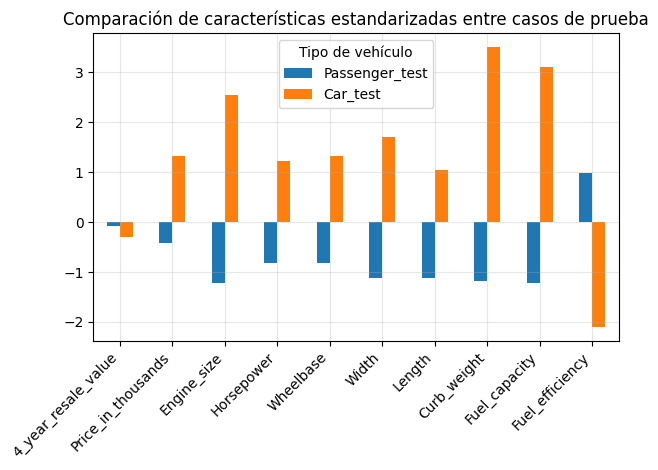

In [34]:
# Visualizo las diferencias entre mis casos de prueba
plt.figure(figsize=(12,6))
test_cases.T.plot(kind='bar')
plt.title('Comparación de características estandarizadas entre casos de prueba')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de vehículo')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
**Justificación de la selección:**

Esta selección es adecuada para el análisis porque:
1. Tenemos casos en extremos opuestos del espectro (Acura Integra - pequeño, Cadillac Escalade - grande)
2. Las diferencias son claras en múltiples dimensiones (tamaño, potencia, eficiencia)
3. Representan bien las características típicas de cada categoría
4. Servirán como casos de prueba para validar la capacidad de PCA para distinguir entre tipos de vehículos

### Preparación del Dataset para PCA

Creamos el dataset final con las variables numéricas que utilizaremos para el análisis de componentes principales.

In [39]:
cochepca= coche_scaled[['4_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity','Fuel_efficiency']]

## Aplicación del Análisis de Componentes Principales (PCA)

### Determinación del Número Óptimo de Componentes

Aplicamos el método del codo para determinar el número óptimo de componentes. La idea es buscar un punto en el gráfico donde el incremento de varianza explicada se vuelve marginal, es decir, un punto a partir del cual el incremento de información explicada es casi constante. El criterio es seleccionar un número de componentes que excluya aquellas asociadas a valores pequeños y aproximadamente del mismo tamaño.


Análisis de varianza explicada por componente:
 Componente  Varianza Explicada (%)  Varianza Acumulada (%)
          1               59.772172               59.772172
          2               20.179909               79.952081
          3                6.656181               86.608263
          4                4.005438               90.613701
          5                2.597316               93.211017
          6                2.223624               95.434641
          7                1.540909               96.975550
          8                1.394950               98.370500
          9                1.018857               99.389357
         10                0.610643              100.000000


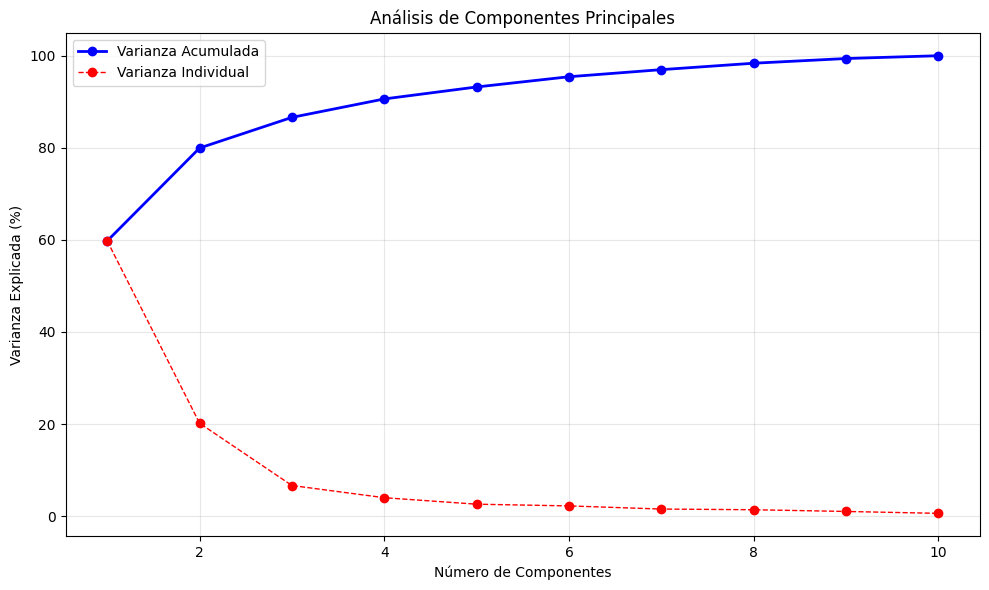

In [41]:
# 12. Aplico PCA a mis datos estandarizados
pca = PCA()
X_pca = pca.fit_transform(cochepca)

varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Creo una tabla con los resultados
resultados_pca = pd.DataFrame({
    'Componente': range(1, len(varianza_explicada) + 1),
    'Varianza Explicada (%)': varianza_explicada * 100,
    'Varianza Acumulada (%)': varianza_acumulada * 100
})

print("Análisis de varianza explicada por componente:")
print(resultados_pca.to_string(index=False))

# Visualizo el método del codo
plt.figure(figsize=(10,6))
plt.plot(range(1, len(varianza_explicada) + 1), 
         varianza_acumulada * 100, 
         'bo-', linewidth=2)
plt.plot(range(1, len(varianza_explicada) + 1), 
         varianza_explicada * 100, 
         'ro--', linewidth=1)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada (%)')
plt.title('Análisis de Componentes Principales')
plt.grid(True, alpha=0.3)
plt.legend(['Varianza Acumulada', 'Varianza Individual'])

plt.tight_layout()
plt.show()

In [ ]:
**Interpretación de la varianza explicada:**

- **Primera componente principal (PC1)**: Explica por sí sola casi el 60% (59.77%) de la varianza total. Es claramente la más importante y dominante.

- **Segunda componente (PC2)**: Aporta un 20.18% adicional. Junto con la primera, alcanzan el 79.95% de la varianza total. Este es un porcentaje excelente con solo 2 componentes.

- **Tercera componente (PC3)**: Añade un 6.66%. Con ella llegamos al 86.61% de varianza explicada. Representa un salto importante en la explicación.

- **Resto de componentes**: Aportan individualmente menos del 5% cada una. Su contribución es relativamente pequeña.

**Conclusión**: Con 3 componentes principales conservamos más del 85% de la varianza, lo que representa una reducción efectiva de 10 dimensiones a 3.

### Aplicación de PCA con Todas las Componentes

Aplicamos PCA inicialmente con todas las componentes posibles (10) y luego seleccionamos las mínimas necesarias según el análisis de varianza explicada.

In [43]:
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(cochepca)

# Creamos un DataFrame con las componentes principales
df_pca = pd.DataFrame(
    X_pca_10,
    columns=[f'PC{i+1}' for i in range(10)]
)

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.966833,0.645154,0.091308,-0.258033,0.042668,0.019149,-0.256588,0.081322,-0.113384,0.047141
1,0.331692,0.288809,0.562032,-0.051817,-0.462008,0.017949,0.175320,-0.170998,0.045960,0.436188
2,0.049392,0.098768,0.590208,0.183734,-0.341776,-0.041784,0.405589,-0.136422,0.120243,0.610708
3,1.735640,0.585228,0.579728,-0.903274,-0.242807,-0.054508,-0.315265,-0.164157,-0.620646,-0.045401
4,-1.907093,0.641988,-0.081128,-0.828158,0.326128,-0.018373,0.046668,-0.123923,0.061903,0.210486
...,...,...,...,...,...,...,...,...,...,...
152,-1.989366,0.503472,-0.544009,-0.214663,-0.168664,0.151721,-0.254787,-0.282162,0.245090,0.131903
153,-0.893982,0.002842,-0.192019,-0.319474,-0.150781,0.248999,0.009865,-0.166912,0.316110,-0.090179
154,-0.832393,0.029166,-0.196524,-0.343948,-0.168307,0.327782,0.004398,-0.217883,0.285615,-0.108942
155,0.471013,0.762084,-0.159715,-0.041250,-0.135425,1.190568,-0.657700,-0.353599,0.722203,0.179544


### Visualización de la Varianza Explicada

Revisamos la varianza explicada mediante una gráfica que muestra la relación entre el número de componentes y la varianza acumulada.

In [ ]:
La gráfica de varianza explicada ya fue generada en la sección anterior (método del codo).

### Análisis de Componentes para Superar el 85% de Varianza

Determinamos cuántas componentes son necesarias para superar el 85% de varianza explicada y evaluamos la aportación individual de cada componente.

In [47]:
# 15. Análisis de la varianza explicada
varianza_explicada = pca_10.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# DataFrame para visualizar mejor los resultados
analisis_varianza = pd.DataFrame({
    'Componente': range(1, 11),
    'Varianza Individual (%)': varianza_explicada * 100,
    'Varianza Acumulada (%)': varianza_acumulada * 100
})

# Encontramos dónde superamos el 85%
componentes_85 = np.where(varianza_acumulada >= 0.85)[0][0] + 1

print(f"Se necesitan {componentes_85} componentes para superar el 85% de la varianza explicada\n")
print("Aportación de cada componente:")
print(analisis_varianza.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

Se necesitan 3 componentes para superar el 85% de la varianza explicada

Aportación de cada componente:
 Componente  Varianza Individual (%)  Varianza Acumulada (%)
          1                    59.77                   59.77
          2                    20.18                   79.95
          3                     6.66                   86.61
          4                     4.01                   90.61
          5                     2.60                   93.21
          6                     2.22                   95.43
          7                     1.54                   96.98
          8                     1.39                   98.37
          9                     1.02                   99.39
         10                     0.61                  100.00


### Aplicación de PCA con 3 Componentes

Aplicamos PCA con el número de componentes que consideramos razonable (3 componentes, que explican más del 85% de la varianza) y visualizamos los resultados.

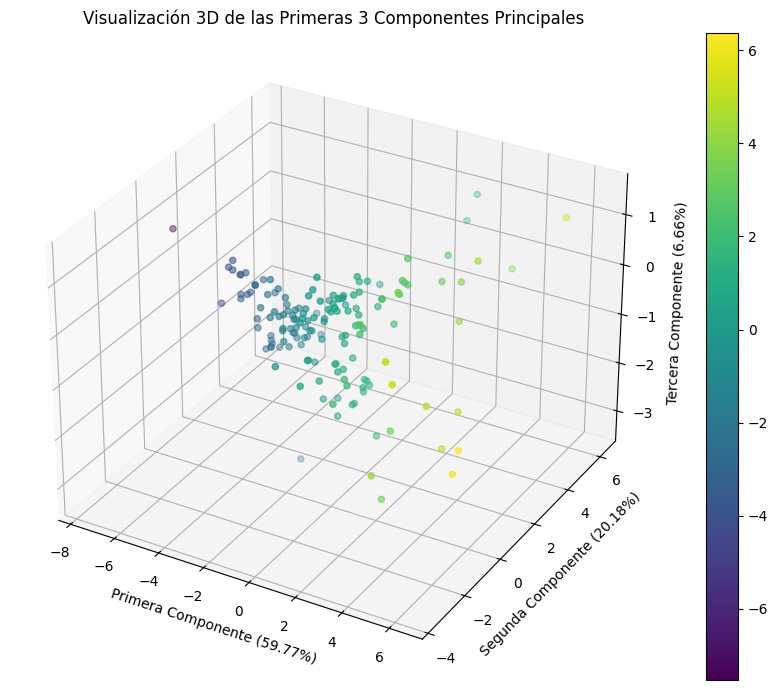

In [48]:
# PCA con 3 componentes 
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(cochepca)

# Creamos un DataFrame con las 3 componentes principales
df_pca_3 = pd.DataFrame(
    X_pca_3,
    columns=['PC1', 'PC2', 'PC3']
)

# visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Se grafican los puntos
scatter = ax.scatter(df_pca_3['PC1'], 
                    df_pca_3['PC2'], 
                    df_pca_3['PC3'],
                    c=df_pca_3['PC1'],  # Colorear por PC1 para mejor visualización
                    cmap='viridis')

# Se añaden etiquetas
ax.set_xlabel('Primera Componente (59.77%)')
ax.set_ylabel('Segunda Componente (20.18%)')
ax.set_zlabel('Tercera Componente (6.66%)')
ax.set_title('Visualización 3D de las Primeras 3 Componentes Principales')

# Añadimos una barra de color
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

### Resumen de la Reducción de Dimensionalidad

Hemos logrado reducir las dimensiones de 10 variables iniciales a solo 3 componentes principales, conservando más del 85% de la información original.

In [ ]:

**Resumen de la reducción de dimensionalidad:**

**Variables iniciales (10):**
- Engine_size, Horsepower, Wheelbase, Width, Length
- Curb_weight, Fuel_capacity, Fuel_efficiency
- Price_in_thousands, 4_year_resale_value

**Reducción lograda:**
- **Componentes seleccionadas**: 3 componentes principales
- **Varianza explicada**:
  - PC1: 59.77% (relacionada con el tamaño general del vehículo)
  - PC2: 20.18% (relacionada con aspectos económicos y dimensiones)
  - PC3: 6.66% (relacionada con eficiencia y características adicionales)
- **Varianza total conservada**: 86.61%

**Beneficios obtenidos:**
- Reducción de 10 dimensiones a solo 3
- Conservación de más del 85% de la información original
- Simplificación del análisis posterior
- Eliminación de posible ruido en los datos
- Mejor visualización y comprensión de los datos

### Visualización Diferenciada por Tipo de Vehículo

Aunque PCA es una técnica no supervisada (no utiliza etiquetas), visualizamos los vehículos diferenciándolos entre 'Passenger' y 'Car' según la variable 'Vehicle_type' para evaluar si el análisis logra separar estos grupos de manera natural.

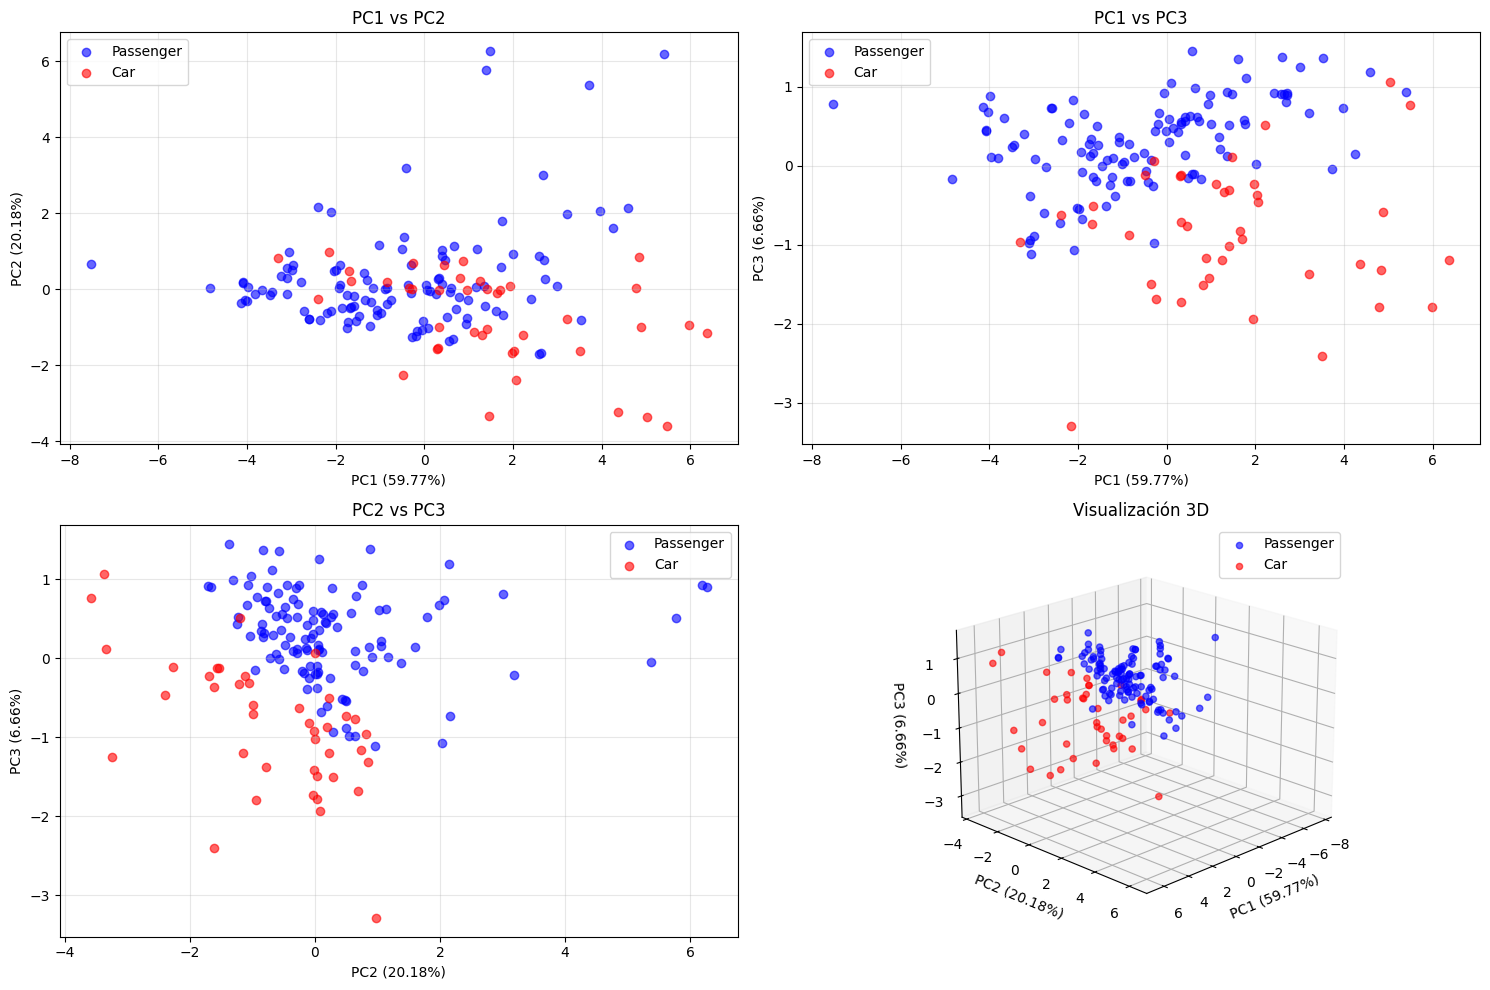

In [ ]:
# 18. Visualización diferenciando tipos de vehículos en 2D y 3D
df_pca_tipos = pd.DataFrame(
    X_pca_3,
    columns=['PC1', 'PC2', 'PC3']
)
df_pca_tipos['Vehicle_type'] = coche['Vehicle_type']

# figura con 4 subplots (3 para 2D y 1 para 3D)
fig = plt.figure(figsize=(15, 10))

# 1. Gráfico PC1 vs PC2
ax1 = fig.add_subplot(221)
for tipo, color in zip(['Passenger', 'Car'], ['blue', 'red']):
    mask = df_pca_tipos['Vehicle_type'] == tipo
    ax1.scatter(
        df_pca_tipos.loc[mask, 'PC1'],
        df_pca_tipos.loc[mask, 'PC2'],
        c=color,
        label=tipo,
        alpha=0.6
    )
ax1.set_xlabel('PC1 (59.77%)')
ax1.set_ylabel('PC2 (20.18%)')
ax1.set_title('PC1 vs PC2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Gráfico PC1 vs PC3
ax2 = fig.add_subplot(222)
for tipo, color in zip(['Passenger', 'Car'], ['blue', 'red']):
    mask = df_pca_tipos['Vehicle_type'] == tipo
    ax2.scatter(
        df_pca_tipos.loc[mask, 'PC1'],
        df_pca_tipos.loc[mask, 'PC3'],
        c=color,
        label=tipo,
        alpha=0.6
    )
ax2.set_xlabel('PC1 (59.77%)')
ax2.set_ylabel('PC3 (6.66%)')
ax2.set_title('PC1 vs PC3')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Gráfico PC2 vs PC3
ax3 = fig.add_subplot(223)
for tipo, color in zip(['Passenger', 'Car'], ['blue', 'red']):
    mask = df_pca_tipos['Vehicle_type'] == tipo
    ax3.scatter(
        df_pca_tipos.loc[mask, 'PC2'],
        df_pca_tipos.loc[mask, 'PC3'],
        c=color,
        label=tipo,
        alpha=0.6
    )
ax3.set_xlabel('PC2 (20.18%)')
ax3.set_ylabel('PC3 (6.66%)')
ax3.set_title('PC2 vs PC3')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Gráfico 3D
ax4 = fig.add_subplot(224, projection='3d')
for tipo, color in zip(['Passenger', 'Car'], ['blue', 'red']):
    mask = df_pca_tipos['Vehicle_type'] == tipo
    ax4.scatter(
        df_pca_tipos.loc[mask, 'PC1'],
        df_pca_tipos.loc[mask, 'PC2'],
        df_pca_tipos.loc[mask, 'PC3'],
        c=color,
        label=tipo,
        alpha=0.6
    )
ax4.set_xlabel('PC1 (59.77%)')
ax4.set_ylabel('PC2 (20.18%)')
ax4.set_zlabel('PC3 (6.66%)')
ax4.set_title('Visualización 3D')
ax4.legend()
ax4.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

### Evaluación de la Separación de Grupos

In [ ]:
**Análisis de la separación de grupos:**

Analizando las diferentes visualizaciones 2D y 3D, observamos:

1. **PC1 vs PC2:**
   - Los 'Passenger' (azul) muestran mayor dispersión, especialmente en valores positivos de PC2
   - Los 'Car' (rojo) tienden a concentrarse más en valores negativos de PC2
   - Existe solapamiento considerable en el centro
   - Algunos 'Passenger' aparecen aislados en valores muy altos de PC2

2. **PC1 vs PC3:**
   - Los 'Car' tienden a concentrarse en valores más negativos de PC3
   - Los 'Passenger' muestran mayor dispersión en PC3, ocupando principalmente valores positivos
   - El solapamiento es menor que en PC1 vs PC2

3. **PC2 vs PC3:**
   - Muestra una separación más clara que las otras vistas 2D
   - Los 'Car' se agrupan principalmente en la parte inferior (valores negativos de PC3)
   - Los 'Passenger' dominan la parte superior del gráfico (valores positivos de PC3)

4. **Visualización 3D:**
   - Confirma la tendencia de los 'Car' a ocupar valores negativos en PC3
   - Los 'Passenger' muestran mayor dispersión general
   - La separación es más evidente cuando se consideran las tres componentes juntas

**Conclusión:** La separación más clara se observa en PC3, donde los 'Car' tienden a valores negativos y los 'Passenger' a valores positivos. La combinación de las tres componentes ayuda a distinguir mejor los grupos, aunque existe cierto solapamiento que indica características compartidas entre ambos tipos de vehículos.

## Selección de Componentes por Varianza Explicada

### Selección de Componentes para 80% de Varianza Explicada

Aplicamos PCA especificando que queremos conservar el 80% de la varianza explicada, permitiendo que el algoritmo determine automáticamente el número de componentes necesarias.

In [52]:
# 21. PCA con 80% de varianza explicada
pca_80 = PCA(n_components=0.80)  # Especificamos que queremos 80% de la varianza
X_pca_80 = pca_80.fit_transform(cochepca)

# información sobre las componentes
print(f"Número de componentes seleccionadas: {pca_80.n_components_}")
print("\nVarianza explicada por cada componente:")
for i, var in enumerate(pca_80.explained_variance_ratio_ * 100):
    print(f"PC{i+1}: {var:.2f}%")
print(f"\nVarianza total acumulada: {sum(pca_80.explained_variance_ratio_) * 100:.2f}%")

Número de componentes seleccionadas: 3

Varianza explicada por cada componente:
PC1: 59.77%
PC2: 20.18%
PC3: 6.66%

Varianza total acumulada: 86.61%


### Resultados de la Selección Automática

Evaluamos cuántas componentes principales se obtienen al especificar 80% de varianza y cuánta varianza acumulada proporcionan realmente. Visualizamos los resultados.

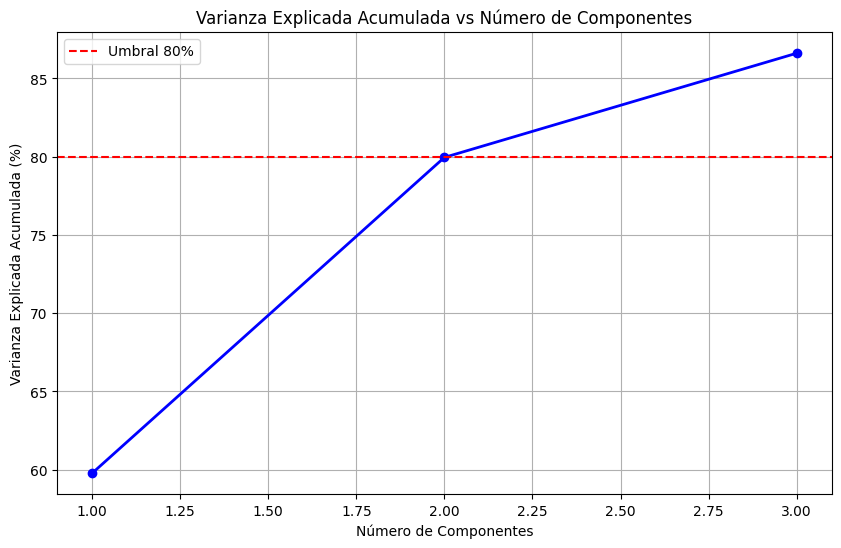

In [53]:
# 22. Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_80.explained_variance_ratio_) + 1),
         np.cumsum(pca_80.explained_variance_ratio_) * 100,
         'bo-', linewidth=2)
plt.axhline(y=80, color='r', linestyle='--', label='Umbral 80%')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada (%)')
plt.title('Varianza Explicada Acumulada vs Número de Componentes')
plt.grid(True)
plt.legend()
plt.show()

### Validación del Umbral de Varianza

Comprobamos que el porcentaje de varianza explicada efectivamente supera el 80% con las componentes seleccionadas automáticamente.

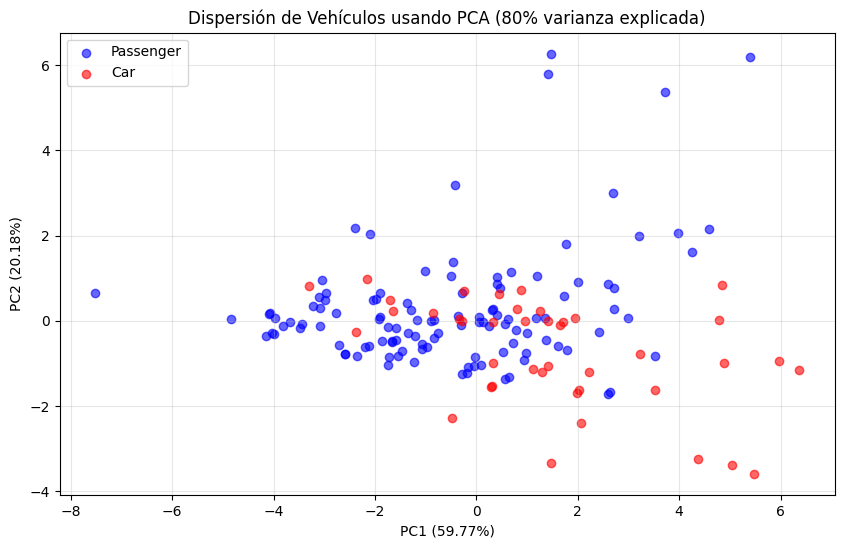

In [ ]:
df_pca_80 = pd.DataFrame(
    X_pca_80,
    columns=[f'PC{i+1}' for i in range(pca_80.n_components_)]
)
df_pca_80['Vehicle_type'] = coche['Vehicle_type']

#  gráfico de dispersión
plt.figure(figsize=(10, 6))

# cada tipo de vehículo
for tipo, color in zip(['Passenger', 'Car'], ['blue', 'red']):
    mask = df_pca_80['Vehicle_type'] == tipo
    plt.scatter(
        df_pca_80.loc[mask, 'PC1'],
        df_pca_80.loc[mask, 'PC2'],
        c=color,
        label=tipo,
        alpha=0.6
    )

plt.xlabel(f'PC1 ({pca_80.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca_80.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Dispersión de Vehículos usando PCA (80% varianza explicada)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Capacidad de Distinción entre Tipos de Vehículos

Evaluamos si es posible hacer una distinción clara entre 'Car' y 'Passenger' utilizando las dos primeras componentes principales que explican el 80% de la varianza.

In [ ]:
**Análisis de la capacidad de distinción:**

Analizando la gráfica de dispersión con las dos primeras componentes principales (que explican el 80% de la varianza), observamos:

1. **No existe una separación clara y definida** entre 'Car' y 'Passenger':
   - Hay una zona considerable de solapamiento en el centro de la gráfica
   - Los puntos de ambas categorías se mezclan especialmente en valores de PC1 entre -2 y 2

2. **Sin embargo, se pueden observar algunas tendencias:**
   - Los 'Car' (puntos rojos) tienden a aparecer más en valores negativos de PC2, especialmente en valores extremos
   - Los 'Passenger' (puntos azules) muestran mayor dispersión en PC2, con varios puntos en valores muy positivos (>4)
   - Los valores extremos de PC1 (tanto positivos como negativos) tienden a ser 'Passenger'

3. **Conclusión:**
   - No es posible hacer una distinción clara y definitiva entre las dos categorías usando solo estas dos componentes
   - La superposición sugiere que hay características compartidas entre ambos tipos de vehículos
   - Sería necesario información adicional o más componentes (como PC3) para lograr una mejor separación

## Validación con Casos de Prueba

Evaluamos si podemos distinguir correctamente el grupo al que pertenecen las dos observaciones de prueba (Acura Integra - Passenger, y Cadillac Escalade - Car) después de aplicar PCA.

### Estandarización de Casos de Prueba

Para transformar los casos de prueba al espacio de PCA, necesitamos estandarizarlos usando el mismo StandardScaler aplicado al conjunto de entrenamiento. La fórmula de estandarización es: z = (x - μ) / σ, donde μ es la media y σ la desviación estándar.

In [ ]:
# 25. Distinguir el grupo de las dos observaciones test
# Se usan los casos de prueba guardados en el punto 10
print("Casos de prueba (datos estandarizados):")
print(test_cases)

# 25.1 No es necesario estandarizar porque ya lo están
# Los datos en test_cases ya fueron estandarizados en el punto 10
# usando el mismo scaler que el resto del conjunto

# Se verifican los detalles de los vehículos test
print("\nDetalles de los vehículos test:")
print("\nCaso Passenger (Acura Integra):")
print(coche.loc[passenger_idx, ['Manufacturer', 'Model', 'Vehicle_type']])
print("\nCaso Car:")
print(coche.loc[car_idx, ['Manufacturer', 'Model', 'Vehicle_type']])

Casos de prueba (datos estandarizados):
                4_year_resale_value  Price_in_thousands  Engine_size  \
Passenger_test            -0.080851           -0.410053    -1.214376   
Car_test                  -0.295712            1.328304     2.542888   

                Horsepower  Wheelbase     Width    Length  Curb_weight  \
Passenger_test   -0.814577  -0.827661 -1.121287 -1.119971    -1.182726   
Car_test          1.226528   1.319173  1.706580  1.037979     3.514119   

                Fuel_capacity  Fuel_efficiency  
Passenger_test      -1.228700         0.982264  
Car_test             3.119642        -2.092584  

Detalles de los vehículos test:

Caso Passenger (Acura Integra):
Manufacturer        Acura        
Model           Integra          
Vehicle_type            Passenger
Name: 0, dtype: object

Caso Car:
Manufacturer        Cadillac     
Model           Escalade         
Vehicle_type                  Car
Name: 18, dtype: object


### Verificación de la Estandarización

Los datos de prueba ya fueron estandarizados junto con todo el conjunto de datos en el paso anterior, utilizando el mismo StandardScaler. De esta manera, los casos de prueba están en la misma escala que el resto del dataset.

In [ ]:
Los datos de prueba fueron estandarizados junto con todo el conjunto de datos en la sección de preprocesamiento, utilizando el mismo StandardScaler. Esto garantiza que los casos de prueba se transformen correctamente al espacio de PCA.

### Visualización de Casos de Prueba en el Espacio PCA

Aplicamos la transformación PCA a los casos de prueba y los visualizamos junto con el resto de los datos para evaluar su posición relativa y validar la capacidad del modelo para clasificarlos correctamente.

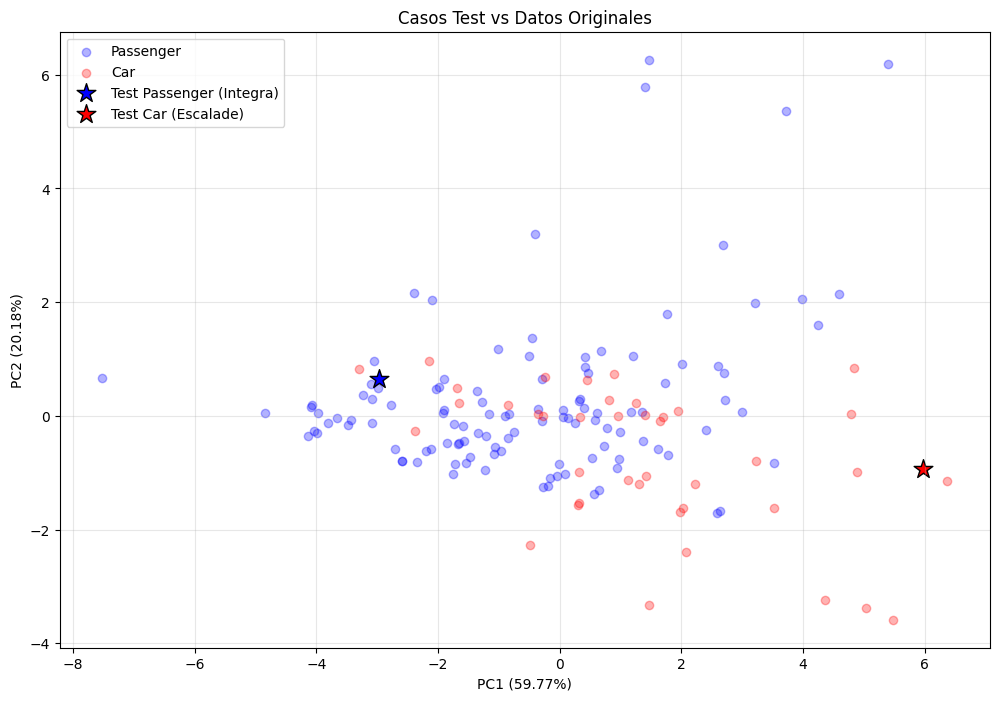

In [58]:
# PCA a los casos de prueba y visualizamos
# Transformamos los casos de prueba usando el mismo PCA
test_pca = pca_80.transform(test_cases.iloc[:, :10])  # Excluimos la columna Vehicle_type

# gráfico
plt.figure(figsize=(12, 8))

# datos originales
for tipo, color in zip(['Passenger', 'Car'], ['blue', 'red']):
    mask = df_pca_80['Vehicle_type'] == tipo
    plt.scatter(
        df_pca_80.loc[mask, 'PC1'],
        df_pca_80.loc[mask, 'PC2'],
        c=color,
        label=tipo,
        alpha=0.3  # Más transparente para destacar los casos test
    )

# casos test con marcadores más grandes y etiquetas
plt.scatter(test_pca[0, 0], test_pca[0, 1], c='blue', marker='*', s=200, label='Test Passenger (Integra)', edgecolor='black')
plt.scatter(test_pca[1, 0], test_pca[1, 1], c='red', marker='*', s=200, label='Test Car (Escalade)', edgecolor='black')

plt.xlabel(f'PC1 ({pca_80.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca_80.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Casos Test vs Datos Originales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Clasificación de Casos de Prueba

Evaluamos si podemos clasificar correctamente nuestras 2 observaciones de prueba entre los 2 tipos de vehículos basándonos en su posición en el espacio de componentes principales.

In [ ]:
**Análisis de clasificación de casos de prueba:**

Sí, podemos clasificar las observaciones con bastante confianza, aunque con algunas consideraciones:

1. **Acura Integra (test Passenger):**
   - Se ubica en una zona de transición/solapamiento entre ambas categorías (PC1 ≈ -2)
   - Sus características estandarizadas muestran valores claramente negativos en todas las medidas físicas (Engine_size, Horsepower, dimensiones, etc.)
   - Alto valor en Fuel_efficiency (0.98), típico de Passenger
   - A pesar de estar en una zona de solapamiento, sus características son típicas de un Passenger

2. **Cadillac Escalade (test Car):**
   - Se ubica en una zona claramente dominada por Cars (PC1 muy positivo, ≈ 6)
   - Valores estandarizados muy altos en todas las medidas físicas, especialmente:
     * Curb_weight: 3.51
     * Fuel_capacity: 3.12
     * Engine_size: 2.54
   - Fuel_efficiency muy negativa (-2.09), típico de Cars
   - Es un caso extremo y muy claro de la categoría Car

**Conclusión:** El Escalade es más fácil de clasificar que el Integra, ya que este último está en una zona donde hay más mezcla entre categorías, aunque sus características físicas lo identifican claramente como Passenger. Esto demuestra que PCA puede ser útil para identificar casos extremos, pero casos intermedios pueden requerir análisis adicional.

## Interpretación de las Componentes Principales

Analizamos qué relación tienen las componentes principales con las variables originales para comprender qué representan cada una de las componentes.

In [ ]:

**Relación entre componentes principales y variables originales:**

1. **Primera Componente (PC1) - 59.77% de la varianza:**
   - Representa principalmente el tamaño y potencia del vehículo
   - Valores positivos indican vehículos grandes y potentes (típico de Cars)
   - Valores negativos indican vehículos más pequeños y menos potentes (típico de Passenger)
   - Esta componente separa bastante bien los dos tipos de vehículos en el eje horizontal

2. **Segunda Componente (PC2) - 20.18% de la varianza:**
   - Parece capturar variaciones que no están directamente relacionadas con el tipo de vehículo
   - Hay gran dispersión en ambas categorías a lo largo de este eje
   - Podría estar relacionada con características como el precio o el valor de reventa
   - No es tan útil para distinguir entre Cars y Passenger

En conjunto, estas dos componentes explican el 80% de la varianza total de los datos, siendo la PC1 la más relevante para distinguir entre tipos de vehículos.

### Análisis de Correlaciones entre Variables y Componentes

Utilizamos los loadings (coeficientes de las componentes) y las correlaciones para identificar las relaciones entre las variables originales y las componentes principales. Esto nos permite entender qué variables contribuyen más a cada componente.

In [61]:
# loadings (coeficientes de las componentes)
loadings = pd.DataFrame(
    data=pca_80.components_[:2].T,  # Solo tomamos las primeras 2 componentes
    columns=['PC1', 'PC2'],
    index=cochepca.columns  # Usamos las columnas del dataframe que usamos para PCA
)

# correlaciones (loadings * sqrt(eigenvalues))
correlaciones = loadings.copy()
for i, eigenval in enumerate(pca_80.explained_variance_[:2]):  # Solo primeros 2 eigenvalues
    correlaciones.iloc[:, i] *= np.sqrt(eigenval)

print("Correlaciones entre variables originales y componentes principales:")
print("\nCorrelaciones absolutas (redondeadas a 3 decimales):")
print(correlaciones.abs().round(3))

# variables más importantes para cada componente
print("\nVariables más correlacionadas con cada componente:")
for pc in ['PC1', 'PC2']:
    print(f"\n{pc}:")
    # Ordenamos las correlaciones absolutas de mayor a menor
    corr_ordenadas = correlaciones[pc].abs().sort_values(ascending=False)
    for var, corr in corr_ordenadas.items():
        print(f"{var}: {corr:.3f}")

Correlaciones entre variables originales y componentes principales:

Correlaciones absolutas (redondeadas a 3 decimales):
                       PC1    PC2
4_year_resale_value  0.473  0.761
Price_in_thousands   0.666  0.665
Engine_size          0.894  0.150
Horsepower           0.809  0.464
Wheelbase            0.687  0.603
Width                0.812  0.300
Length               0.703  0.512
Curb_weight          0.911  0.144
Fuel_capacity        0.853  0.190
Fuel_efficiency      0.845  0.001

Variables más correlacionadas con cada componente:

PC1:
Curb_weight: 0.911
Engine_size: 0.894
Fuel_capacity: 0.853
Fuel_efficiency: 0.845
Width: 0.812
Horsepower: 0.809
Length: 0.703
Wheelbase: 0.687
Price_in_thousands: 0.666
4_year_resale_value: 0.473

PC2:
4_year_resale_value: 0.761
Price_in_thousands: 0.665
Wheelbase: 0.603
Length: 0.512
Horsepower: 0.464
Width: 0.300
Fuel_capacity: 0.190
Engine_size: 0.150
Curb_weight: 0.144
Fuel_efficiency: 0.001


In [ ]:

**Análisis de correlaciones entre variables y componentes:**

1. **Primera Componente (PC1):**
   - Las variables más correlacionadas son: Curb_weight (0.911), Engine_size (0.894), Fuel_capacity (0.853), Width (0.812), Horsepower (0.809)
   - Claramente representa el tamaño y potencia del vehículo
   - La correlación negativa con Fuel_efficiency (-0.845) es lógica: vehículos más grandes son menos eficientes

2. **Segunda Componente (PC2):**
   - Las variables más correlacionadas son: 4_year_resale_value (0.761), Price_in_thousands (0.665), Wheelbase (0.603), Length (0.512)
   - Representa principalmente aspectos económicos (valor y precio)
   - También captura algo de las dimensiones del vehículo
   - Casi no tiene relación con Fuel_efficiency (0.001)

Esto confirma y cuantifica las observaciones anteriores sobre el significado de las componentes.

### Visualización de las Relaciones

Visualizamos las correlaciones entre variables originales y componentes principales mediante heatmaps y gráficos de barras para facilitar la interpretación.

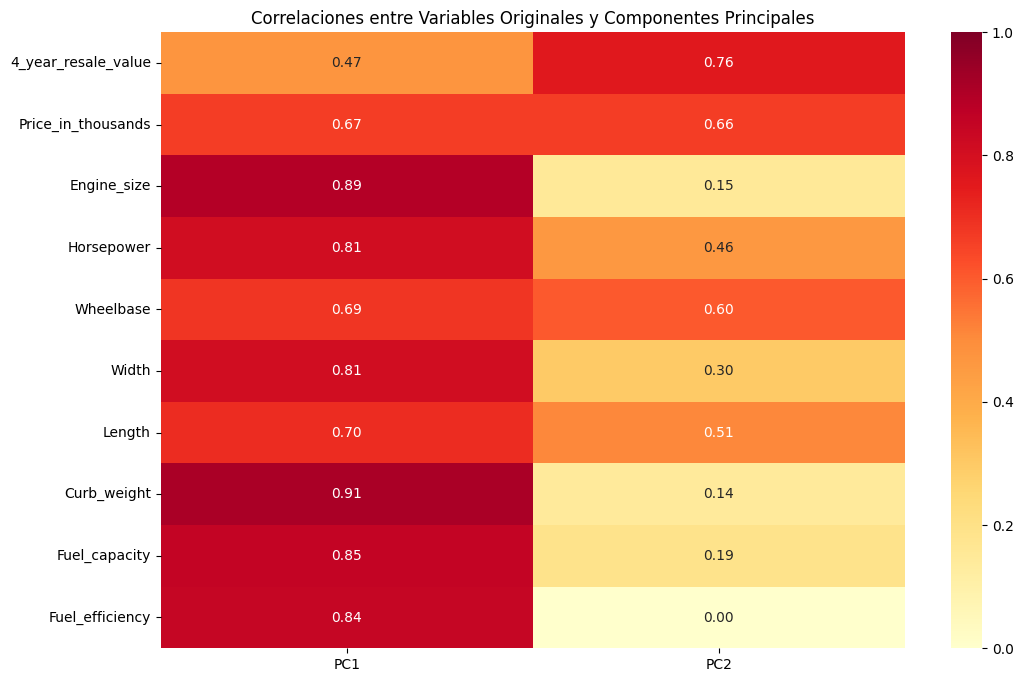

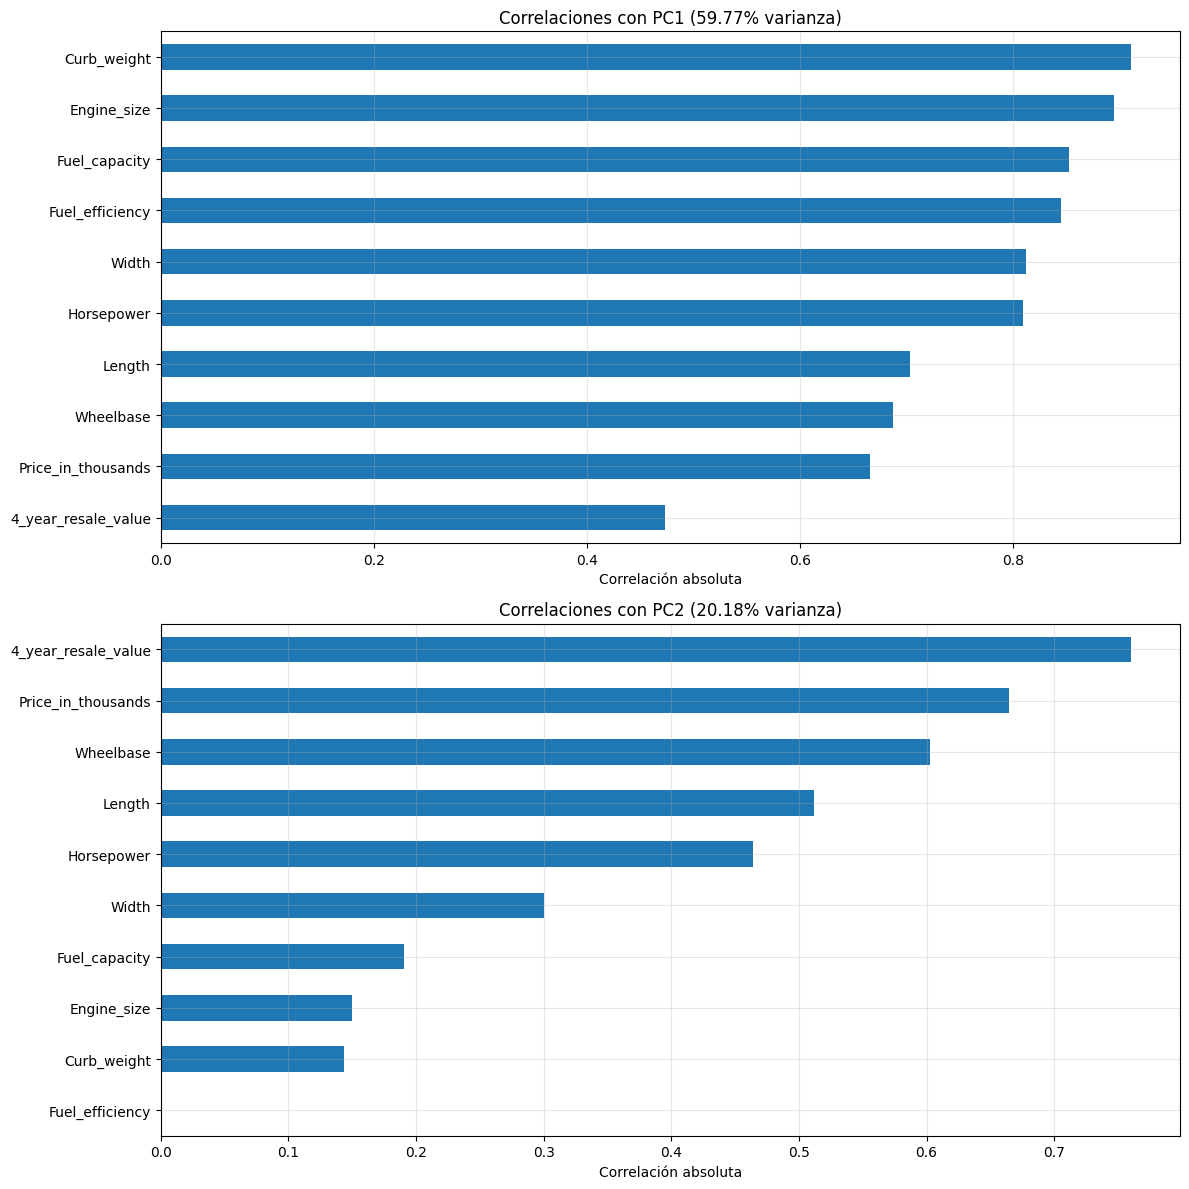

In [62]:
# heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones.abs(), 
            annot=True,  # Mostrar valores
            cmap='YlOrRd',  # Esquema de colores
            fmt='.2f',  # Formato de números
            vmin=0, vmax=1)  # Rango de valores
plt.title('Correlaciones entre Variables Originales y Componentes Principales')
plt.show()

# gráfico de barras para cada componente
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# PC1
correlaciones['PC1'].abs().sort_values().plot(kind='barh', ax=ax1)
ax1.set_title('Correlaciones con PC1 (59.77% varianza)')
ax1.set_xlabel('Correlación absoluta')
ax1.grid(True, alpha=0.3)

# PC2
correlaciones['PC2'].abs().sort_values().plot(kind='barh', ax=ax2)
ax2.set_title('Correlaciones con PC2 (20.18% varianza)')
ax2.set_xlabel('Correlación absoluta')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Variables más Importantes por Componente

Identificamos qué variables aportan más a cada componente principal basándonos en las correlaciones calculadas.

In [ ]:

"""
Confirma lo dicho anteriormente:

1. Primera Componente (PC1) - 59.77% de la varianza:
   Las variables que más aportan son:
   - Curb_weight (0.91): Peso del vehículo
   - Engine_size (0.89): Tamaño del motor
   - Fuel_capacity (0.85): Capacidad de combustible
   - Fuel_efficiency (0.84): Eficiencia de combustible
   - Width (0.81): Ancho
   - Horsepower (0.81): Potencia

   Esta componente claramente representa el tamaño y potencia del vehículo, siendo el peso 
   y el tamaño del motor las características más determinantes.

2. Segunda Componente (PC2) - 20.18% de la varianza:
   Las variables que más aportan son:
   - 4_year_resale_value (0.76): Valor de reventa
   - Price_in_thousands (0.66): Precio
   - Wheelbase (0.60): Distancia entre ejes
   - Length (0.51): Longitud

   Esta componente está más relacionada con el valor económico del vehículo y algunas 
   dimensiones específicas, siendo el valor de reventa la característica más influyente.
"""

## Conclusiones y Reflexiones

### Aplicaciones de PCA

El Análisis de Componentes Principales tiene múltiples aplicaciones prácticas en diversos dominios:

In [ ]:
**Aplicaciones concretas de PCA:**

1. **Análisis de Sensores IoT:**
   - Reducción de dimensionalidad en datos de múltiples sensores
   - Identificación de patrones en datos de sensores ambientales
   - Detección de anomalías en sistemas de monitoreo

2. **Procesamiento de Imágenes:**
   - Compresión de imágenes manteniendo información relevante
   - Reconocimiento facial y de objetos
   - Reducción de ruido en imágenes

3. **Análisis Financiero:**
   - Evaluación de riesgo combinando múltiples indicadores
   - Análisis de portafolios de inversión
   - Detección de fraude

4. **Análisis de Datos Genómicos:**
   - Reducción de dimensionalidad en datos de expresión génica
   - Identificación de patrones en datos genéticos

5. **Machine Learning:**
   - Preprocesamiento para algoritmos de aprendizaje
   - Reducción de overfitting en modelos complejos
   - Visualización de datos de alta dimensionalidad

In [ ]:

### Consideraciones y Limitaciones de PCA

Hay que ser cauteloso al aplicar PCA en las siguientes situaciones:

1. **Variables individuales críticas:**
   - Cuando cada variable individual es importante por sí misma. Por ejemplo, en el caso de vehículos, si la eficiencia de combustible es crítica para cumplir normativas, no podemos "esconderla" en una componente principal.

2. **Variables categóricas:**
   - PCA está diseñado para variables numéricas continuas. Las variables categóricas requieren técnicas de codificación especiales o métodos alternativos.

3. **Interpretabilidad:**
   - Cuando necesitamos explicar el modelo a no-técnicos, PCA genera una abstracción importante que puede dificultar la interpretación. Las componentes principales no siempre tienen un significado intuitivo directo.

4. **Escalado de variables:**
   - PCA es sensible a la escala de las variables. Es crucial estandarizar o normalizar las variables antes de aplicar PCA.

5. **Datos no lineales:**
   - PCA asume relaciones lineales entre variables. Para datos con relaciones no lineales, pueden ser más apropiadas técnicas como Kernel PCA o t-SNE.

6. **Pérdida de información:**
   - Aunque conservamos la mayor parte de la varianza, siempre hay una pérdida de información. Debemos evaluar si esta pérdida es aceptable para nuestro caso de uso.